### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
#Import the standard modules for use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
##Read the dataset from the local copy 
##We already know that there are are na values. Lets drop them using dropna
vehicle_df = pd.read_csv("vehicle.csv").dropna()

#Sanity check
vehicle_df.head(2).T

,0,1
compactness,95,91
circularity,48,41
distance_circularity,83,84
radius_ratio,178,141
pr.axis_aspect_ratio,72,57
max.length_aspect_ratio,10,9
scatter_ratio,162,149
elongatedness,42,45
pr.axis_rectangularity,20,19
max.length_rectangularity,159,143


In [3]:
##Check the general characteristics of the dataset
print(vehicle_df.info())

print(vehicle_df.shape)
#We had dropped all the na values and now have 813 records and 19 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [4]:
##We also have the dependent variable available. Check the class distribution
print("Class distribution:\n",vehicle_df["class"].value_counts())

#We have more cars (because it basically includes data from 2 models as given in the description)

Class distribution:
 car    413
bus    205
van    195
Name: class, dtype: int64


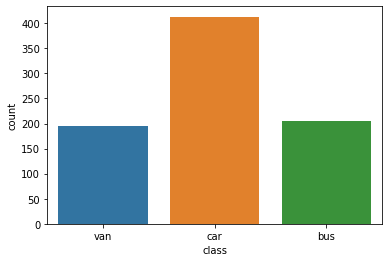

In [5]:
#Plot the distribution
sns.countplot(vehicle_df["class"])

### Check for any missing values in the data 

In [6]:
##Do a check again to check if there are any missing values. We expect to see none since we dropped them already
print(vehicle_df[vehicle_df.isna()].count())

#As expected none of the columns have missing values

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [7]:
##Before standardization lets drop the class column. We will store a copy of the DF to work forward later
vehicle_df_base = vehicle_df.copy()

#Drop class variable
vehicle_df.pop("class")

#Keep the column names for use later
col_names = vehicle_df.columns
#Sanity to check if class has gone
vehicle_df.head(2).T

,0,1
compactness,95.0,91.0
circularity,48.0,41.0
distance_circularity,83.0,84.0
radius_ratio,178.0,141.0
pr.axis_aspect_ratio,72.0,57.0
max.length_aspect_ratio,10.0,9.0
scatter_ratio,162.0,149.0
elongatedness,42.0,45.0
pr.axis_rectangularity,20.0,19.0
max.length_rectangularity,159.0,143.0


In [8]:
#We will use StandardScaler to standardize
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
vehicle_df = sc.fit_transform(vehicle_df)

#check sanity
vehicle_df[0]

array([ 0.16323063,  0.52040788,  0.06066872,  0.26497017,  1.2832543 ,
        0.2997208 , -0.19851729,  0.12964799, -0.21715097,  0.76631152,
       -0.39739727, -0.33901388,  0.30167634, -0.32119222, -0.07152328,
        0.37128716, -0.3218087 ,  0.17183708])

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [9]:
#Import KMeans
from sklearn.cluster import KMeans

In [10]:
##We will initialize cluster_error to capture the errors(inertia) for the different range of k values
cluster_errors = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [11]:
##We will iterate for k values from 1 to 10 and try to capture the intertia data
cluster_range = range(1, 11)
for num_clusters in cluster_range:
  kmean = KMeans(n_clusters=num_clusters,n_init = 15, random_state=5)
  kmean.fit(vehicle_df)
  cluster_errors.append(kmean.inertia_)

#Store the cluster range value and the inertia in a dataframe for plotting later
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print("Cluster Range and the Error values:\n",clusters_df)

##Lets plot the elbow..we should see it around 4

Cluster Range and the Error values:
    num_clusters  cluster_errors
0             1    14634.000000
1             2     8623.136976
2             3     7037.467395
3             4     5739.201327
4             5     5185.908468
5             6     4706.497704
6             7     4350.686420
7             8     4089.485095
8             9     3847.137109
9            10     3652.328653


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

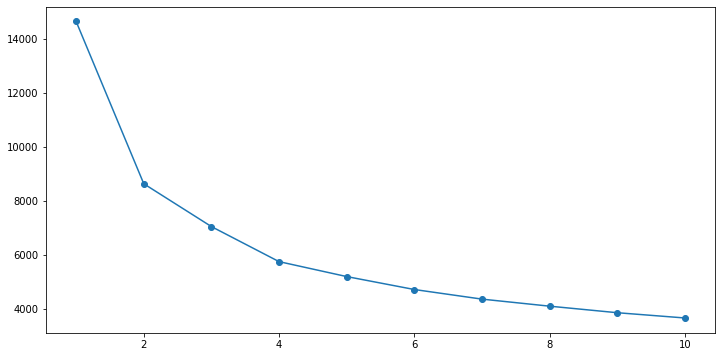

In [12]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [13]:
#Based on the elbow plot and also the inertia values we can consider k as 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [14]:
##Lets now use k = 4 and build the KMeans clusters
kmean_clusters = KMeans(n_clusters=4,n_init = 15, random_state=5)
#Fit the data
kmean_clusters.fit(vehicle_df)

#Get the labels
labels = kmean_clusters.predict(vehicle_df)

# Centroid values
centroids = kmean_clusters.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print(centroids) 

Centroid values
[[-2.28397024e-01 -5.77112825e-01 -3.08062421e-01 -4.12415311e-02
   1.78444965e-01 -1.73698681e-01 -4.56879712e-01  3.21990722e-01
  -4.85591783e-01 -5.39969043e-01 -4.21528655e-01 -4.61480779e-01
  -6.05499266e-01 -6.42849115e-01 -6.23412553e-02  1.29630066e-02
   8.22191910e-01  7.05383081e-01]
 [ 1.15442786e+00  1.18428647e+00  1.21198691e+00  9.73321772e-01
   9.49213388e-02  2.18659142e-01  1.29796844e+00 -1.21424667e+00
   1.30184458e+00  1.09830595e+00  1.20590258e+00  1.30898668e+00
   1.09121291e+00 -1.07878646e-01  1.68326262e-01  2.67954844e-01
   4.67043879e-03  1.90327006e-01]
 [-9.15758407e-01 -5.22402678e-01 -8.89505987e-01 -1.08772789e+00
  -5.61970783e-01 -3.00015871e-01 -7.79778853e-01  8.67364185e-01
  -7.45939378e-01 -4.85536418e-01 -8.01746438e-01 -7.83836827e-01
  -3.90574645e-01  7.83159216e-01 -9.02385712e-02 -2.96089665e-01
  -1.04774549e+00 -1.10361198e+00]
 [-7.33024343e-01  7.27349604e-02 -2.72170954e-01  2.94768327e+00
   6.83665190e+00  8.

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [15]:
#Store the centroids captured in a dataframe along with the column names
centroid_df = pd.DataFrame(centroids, columns = col_names)
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.228397,-0.577113,-0.308062,-0.041242,0.178445,-0.173699,-0.456880,0.321991,-0.485592,-0.539969,-0.421529,-0.461481,-0.605499,-0.642849,-0.062341,0.012963,0.822192,0.705383
1,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
2,-0.915758,-0.522403,-0.889506,-1.087728,-0.561971,-0.300016,-0.779779,0.867364,-0.745939,-0.485536,-0.801746,-0.783837,-0.390575,0.783159,-0.090239,-0.296090,-1.047745,-1.103612
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


### Use kmeans.labels_ function to print out the labels of the classes

In [16]:
## creating a new dataframe only for labels and converting it into categorical variable
vehicle_labels = pd.DataFrame(labels , columns = ["labels"])

vehicle_labels['labels'] = vehicle_labels['labels'].astype('category')

#sanity
print(vehicle_labels.head(5))

#Unique labels
vehicle_labels["labels"].unique()

  labels
0      0
1      0
2      1
3      0
4      3


[0, 1, 3, 2]
Categories (4, int64): [0, 1, 3, 2]

In [17]:
#Lets join the labels to the DF
vehicle_df = pd.DataFrame(vehicle_df,columns=col_names)

vehicle_df = vehicle_df.join(vehicle_labels)

#Sanity
vehicle_df.head(6).T

,0,1,2,3,4,5
compactness,0.163231,-0.322874,1.25697,-0.0798216,-1.05203,0.406283
circularity,0.520408,-0.619123,0.845988,-0.619123,-0.130753,-0.293543
distance_circularity,0.0606687,0.124067,1.51882,-0.00272931,-0.763506,-0.573312
radius_ratio,0.26497,-0.836393,1.18773,-0.300595,1.06867,0.116137
pr.axis_aspect_ratio,1.28325,-0.599253,0.530251,0.15375,5.17377,0.404751
max.length_aspect_ratio,0.299721,0.0857849,0.299721,0.0857849,9.28503,-0.556023
scatter_ratio,-0.198517,-0.59172,1.16257,-0.742952,-0.59172,-0.470734
elongatedness,0.129648,0.514333,-1.15264,0.642562,0.514333,0.129648
pr.axis_rectangularity,-0.217151,-0.606014,0.949438,-0.606014,-0.606014,-0.606014
max.length_rectangularity,0.766312,-0.337462,0.697326,-0.337462,-0.268476,-0.337462


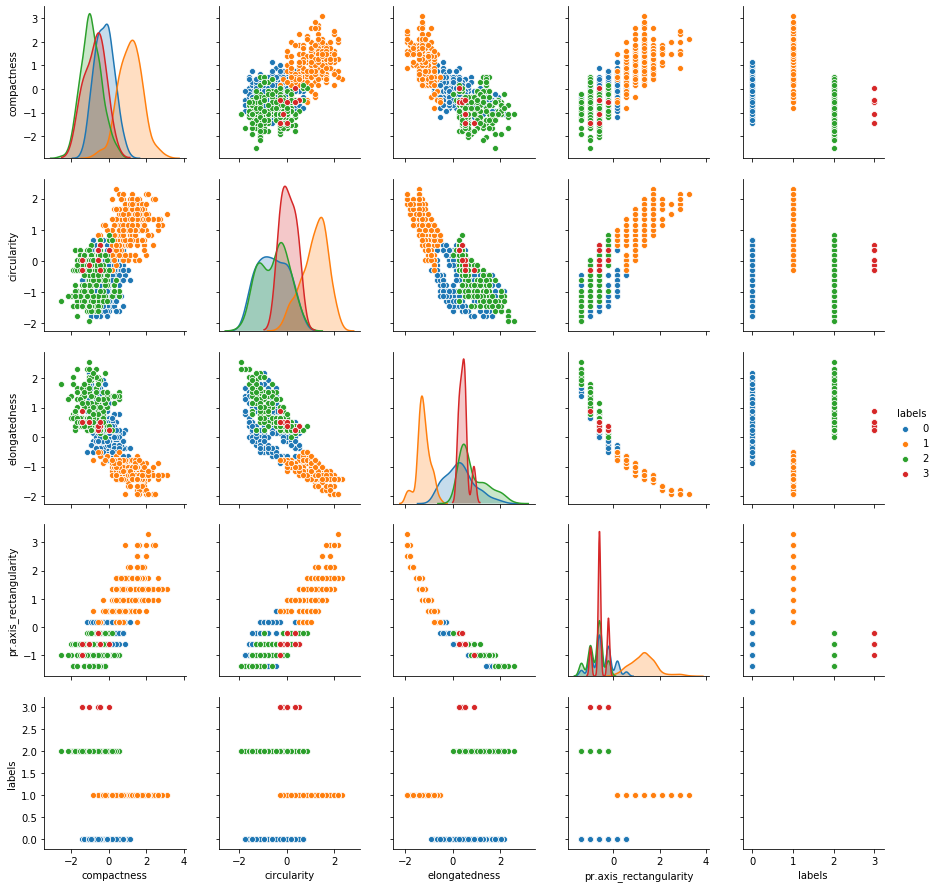

In [18]:
##Plot the new labels on scatter plot and see how it looks...
#Since we have 18 features we will use pairplot on few of the features
sns.pairplot(vehicle_df[["compactness","circularity","elongatedness","pr.axis_rectangularity","labels"]]\
             ,diag_kind="kde",hue="labels")

##We can see some elements of clusters coming thru

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [19]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

##Sanity
print("a",a[1],a.shape)
print("b",b[1],b.shape)
print("c",c[1],c.shape)

a [11.68725556  1.25098137] (100, 2)
b [ 2.89254028 22.63834757] (50, 2)
c [11.5710108  21.57381989] (100, 2)


a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [20]:
##Combine all the arrays into one dataframe
a_df = pd.DataFrame(a)
b_df = pd.DataFrame(b)
c_df = pd.DataFrame(c)

#Sanity Check
print("a :",a.shape)
print(a_df.head(1))

#Sanity Check
print("b :",b.shape)
print(b_df.head(1))


#Sanity Check
print("c :",c.shape)
print(c_df.head(1))

#Concat all the dataframes
test_df = pd.concat([a_df,b_df,c_df],ignore_index=True)

#Sanity check for test
print("\nConcatenated DF",test_df.shape)
print(test_df.head(5))



a : (100, 2)
           0         1
0  13.882785  4.438501
b : (50, 2)
          0          1
0  1.079408  18.626775
c : (100, 2)
         0         1
0  8.81694  17.14149

Concatenated DF (250, 2)
           0         1
0  13.882785  4.438501
1  11.687256  1.250981
2  10.316397  1.449346
3   9.837412 -2.041974
4   8.691601 -4.289773


In [21]:
##Check how the test_df looks 
test_df.describe()

,0,1
count,250.000000,250.000000
mean,8.059822,12.010199
std,4.351794,10.214537
min,-4.599682,-6.238665
25%,6.997280,0.537831
50%,9.536742,17.791111
75%,10.994620,20.530821
max,13.882785,25.652581


### 10. Use scatter matrix to print all the 3 distributions

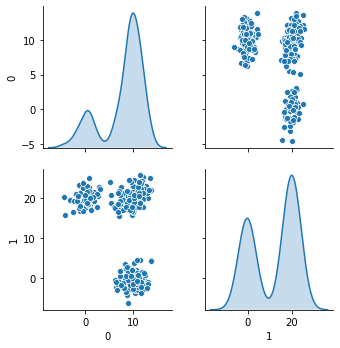

In [22]:
##Lets plot a pairplot and see how the data points look
sns.pairplot(test_df,diag_kind="kde")

#We can see three clusters in the scatter plots...
#We can see min of 2 clusters to a max of about 4 clusters from the peaks of the pair plot diagnal

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [23]:
#Import the linkage and dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

In [24]:
##Get the linkage matrix for the test_df
test_df_linkage = linkage(test_df,method='ward', metric='euclidean')

#Check sample
test_df_linkage[0:3]

array([[6.00000000e+00, 3.50000000e+01, 4.03105214e-02, 2.00000000e+00],
       [1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00]])

### 12. Plot the dendrogram for the consolidated dataframe

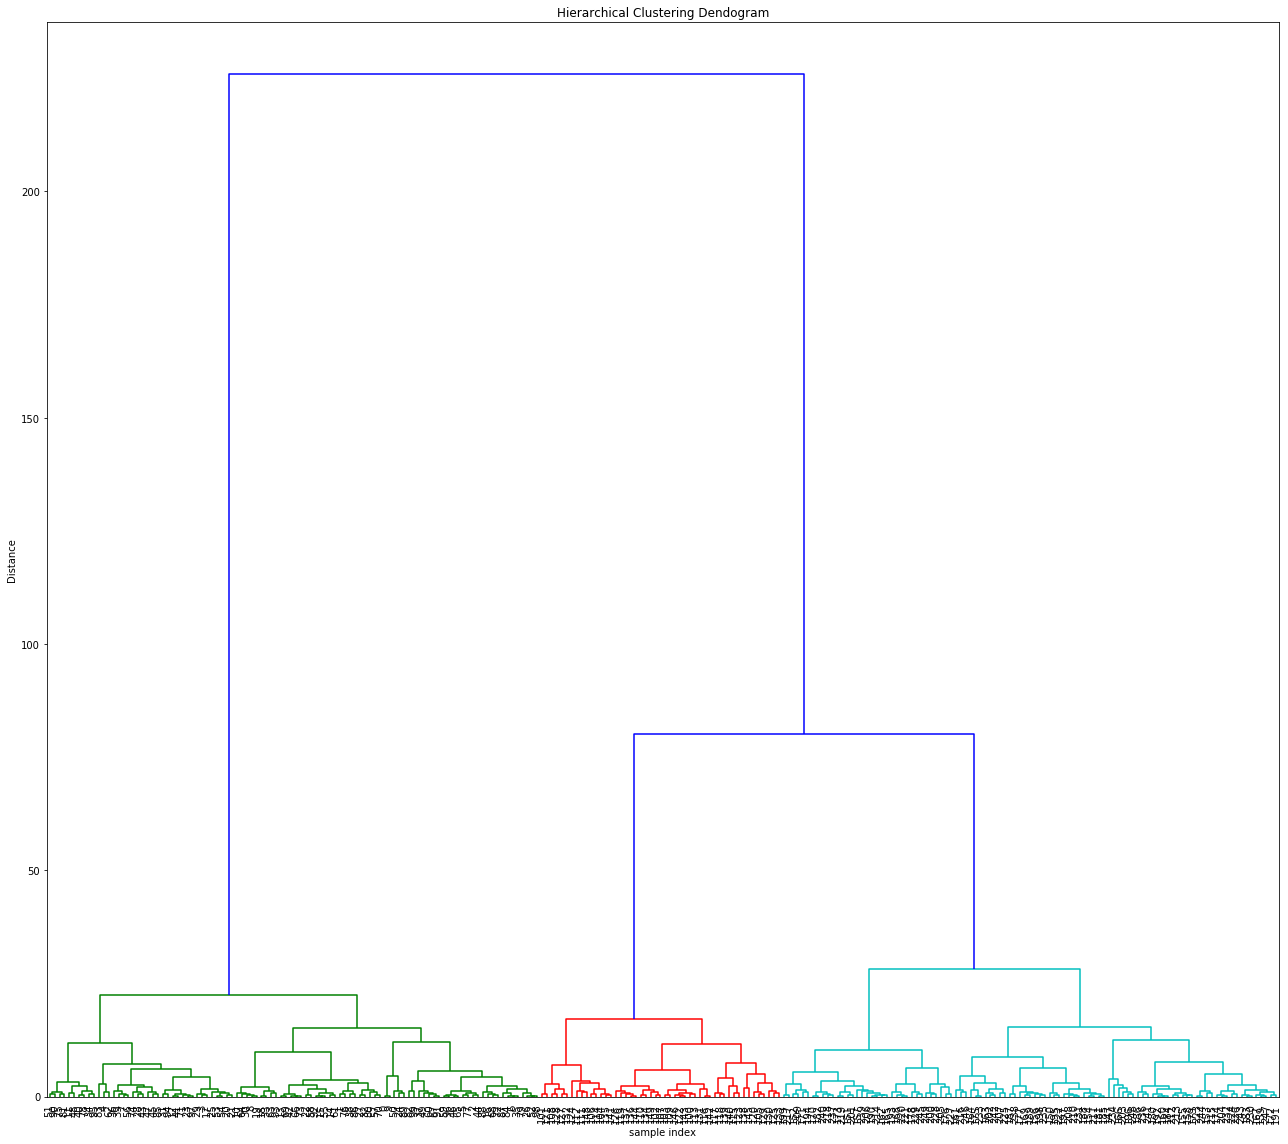

In [25]:
#Plot the dendrogram 
plt.figure(figsize=(18, 16))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')

dendrogram(test_df_linkage,leaf_rotation=90.0,p=20,color_threshold=30,leaf_font_size=10,truncate_mode='level')

plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

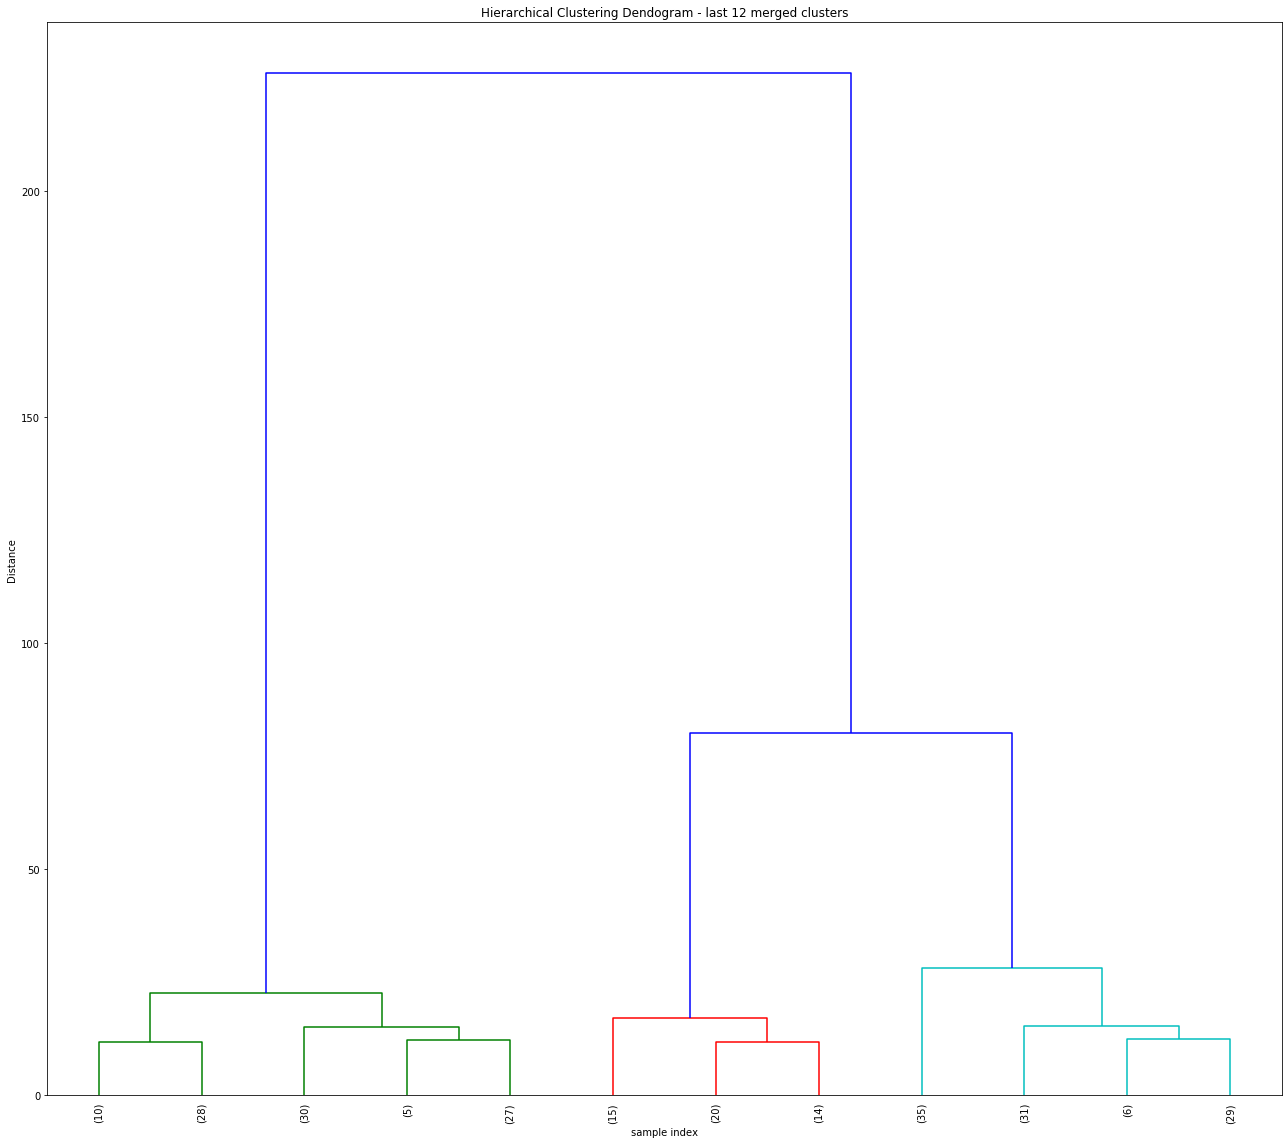

In [26]:
#Plot the dendrogram for last 12 merged clusters
plt.figure(figsize=(18, 16))
plt.title('Hierarchical Clustering Dendogram - last 12 merged clusters')
plt.xlabel('sample index')
plt.ylabel('Distance')

dendrogram(test_df_linkage,leaf_rotation=90.0,p=12,color_threshold=30,leaf_font_size=10,truncate_mode='lastp')

plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [27]:
##From the above dendrogram we can use an distance of 50 to get us 3 distinct clusters

#import fcluster
from scipy.cluster.hierarchy import fcluster

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [28]:
##Using distance measure as 50
test_fcluster = fcluster(test_df_linkage,t=50.0,criterion="distance")

#Check the values
print(test_fcluster)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [29]:
##Lets now add this cluster labels back to our test_df

#Join the labels to the original data set
test_df = test_df.join(pd.DataFrame(test_fcluster,columns=["labels"]))

#sanity check
test_df.sample(5)

,0,1,labels
241,8.712640,21.618600,3
246,6.958291,16.448655,3
45,11.205272,-2.181280,1
49,9.208590,2.310012,1
215,11.222885,17.799926,3


### Use matplotlib to visually observe the clusters in 2D space 

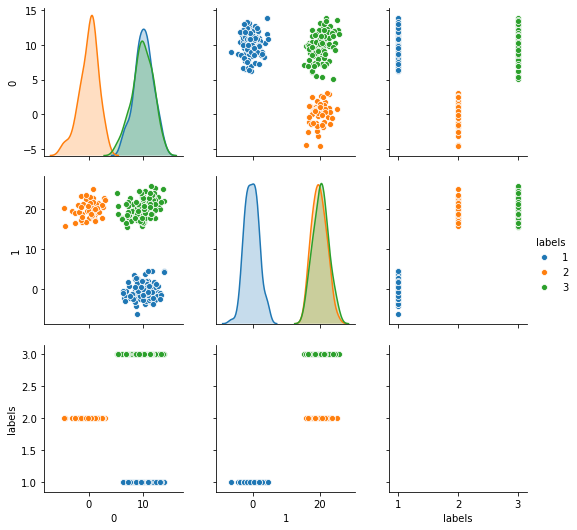

In [30]:
#Visualize the data to see if the clusters were formed

sns.pairplot(test_df,diag_kind="kde",hue="labels")

##The three clusters are now seen in the pairplot

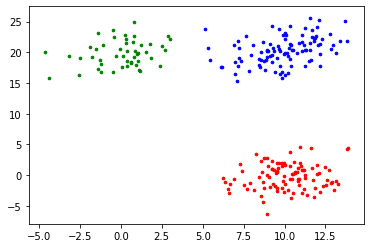

In [31]:
#Visualization of the labels only
colors = ["w","r","g","b"]
fig, ax = plt.subplots()
for i in range(0,250):
    c = test_df.iloc[i,2]
    ax.scatter(test_df.iloc[i,0],test_df.iloc[i,1],s=7,c=colors[c])